# 군집 분석 
- 주어진 데이터들을 특성에 따라 유사한 것끼리 묶음으로써 각 유형별 특징을 분석하는 기법

- 분류 분석과 동일하게 데이터는 하나의 군집에 할당됨
    - 단, 군집의 경우 비지도 학습의 일종으로 레이블 정보를 학습과정에서 이용하지 않음

- 같은 군집 내 데이터들의 거리를 최소화 하거나 다른 군집간의 거리를 최대화하는 군집을 형성 
    - 거리 계산은 유클리드 거리(직선 거리)가 보편적으로 많이 사용됨

- 거리만 잘 적용되면 모든 유형의 데이터에 적용이 가능하나 거리와 가중치 정의가 어렵고 결과 해석이 어려운 단점이 있음

# 군집 분석 방법론
- 계층적(Hierarchical) 방법
    - 가까운 개체끼리 차례로 묶거나 멀리 떨어진 개체를 차례로 분리해 가는 군집 방법
    - 한 번 군집에 할당된 객체는 다시 분리되지 않는 것이 특징
    - 비계층적 방법에 비해 계산량이 많고 시간이 오래 걸림

- 비계층적(Non Hierarchical) 방법
    - 랜덤으로 데이터를 군집화하고 군집 과정에서 값의 변화에 따라 각 데이터들을 적절한 군집으로 이동시키면서 분리해 가는 군집 방법


In [14]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 

In [15]:
# 군집 데이터 가져오기
import seaborn as sns
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
df['species'] = df['species'].astype('category').cat.codes  # 방법1 
df.rename(columns={'species':'target'}, inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
# 데이터 분할하기
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# 4개의 특성을 가지고 있어 시각화 하기 어려움이 존재
# PCA를 통해 2개의 특성으로 차원을 축소
from sklearn.decomposition import PCA
P = PCA(n_components=2)  # PCA는 수학적으로 직교 선형 변환으로 정의된다. 직교 선형 변환이란 어떤 데이터를 새로운 좌표계로 변환하는 것을 말한다. 
X_PCA = P.fit_transform(X)
X.shape, X_PCA.shape

((150, 4), (150, 2))

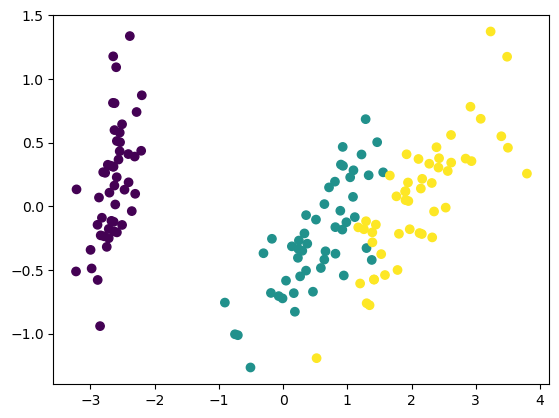

In [19]:
# PCA된 데이터를 이용하여 시각화
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=Y)

# K Means
- 비지도 학습 기반의 대표적인 비계층적 군집 알고리즘
- 사전에 정의된 군집 수 K개로 데이터를 분할
    - 데이터는 K개의 군집 중심에서 가장 가까운 군집에 할당
    - 군집의 중심점과 데이터 간의 거리를 계산하기 때문에 계층적 군집 알고리즘에 비해 계산량이 적음
- 최적의 군집 수 K를 정의하는 것이 많이 어려움

## 군집 형성 과정
- Step 1 랜덤하게 K개(사전의 정의)의 중앙점을 지정
- Step 2 유클리드 거리를 이용하여 군집의 중심점과의 거리 계산 및 가장 거리가 가까운 군집으로 군집 할당
- Step 3 군집 내 데이터의 평균을 계산 후 새로운 중심점으로 배정 및 중심점이 더 이상 이동 안 할 때까지 반복

In [20]:
# KMeans 모델 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3) # 군집은 3개로 형성

In [21]:
# 모델 학습
model.fit(X_PCA)

/Users/yeongsun/anaconda3/envs/llm/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [22]:
# 군집의 중심점 확인
model.cluster_centers_

array([[-2.64241546,  0.19088505],
       [ 2.34652659,  0.27393856],
       [ 0.66567601, -0.3316042 ]])

In [23]:
# fit 과정에서 사용된 데이터의 군집 결과 확인
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

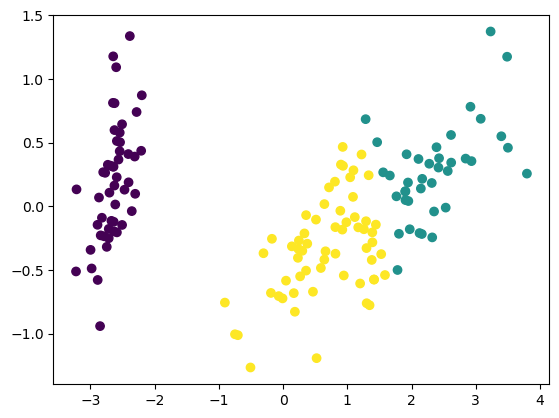

In [24]:
# 군집 결과시각화
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=model.labels_)

In [25]:
# DBSCAN 모델 생성
from sklearn.cluster import DBSCAN
model = DBSCAN() 

In [27]:
# 모델 학습
model.fit(X_PCA)

DBSCAN()

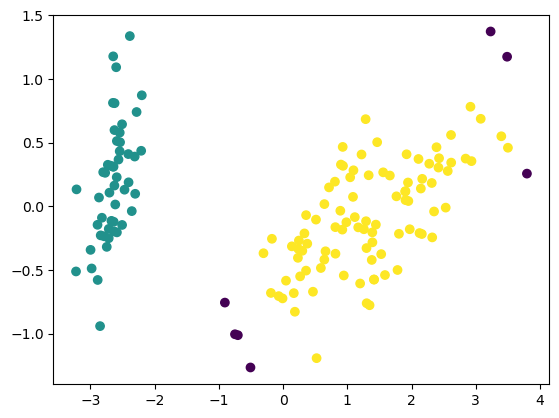

In [28]:
# 군집 결과시각화
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=model.labels_)

- min_samples 또는 eps 값의 조절이 필요하지만 최우선적으로는 표준화를 적용
    - DBSCAN의 경우 밀도를 기반으로 하기 때문에 데이터 스케일에 영향이 있음
    - 데이터의 값 범위가 0\~1사이에서 0.1과 0\~100사이의 0.1은 차이가 있기 때문

In [29]:
# 정규화 진행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_PCA)

In [30]:
model = DBSCAN() 
model.fit(x_scaled)

DBSCAN()

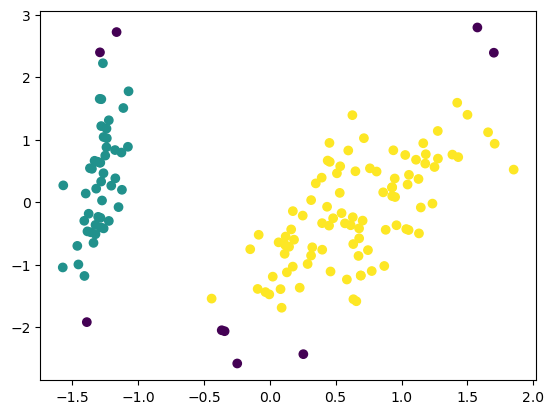

In [32]:
# 군집 결과시각화
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=model.labels_)

# 군집 알고리즘 평가
- 군집 알고리즘은 비지도 학습에서 사용되는 방법으로 레이블 되지 않은 데이터가 있을 때 많이 이용하는 방법

- 각 데이터와 가장 가까운 중심점 사이의 평균 제곱 거리를 이용하는 이너샤(inertia)를 사용하면 K값에 따른 이너샤의 변화를 확인할 수 있고 적정 군집 수 K를 정의할 수 있음

- 실제값이 없다면 실루엣 가중치를 사용함
    - 한 클러스터 안에 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한 지를 나타냄
        - 응집도와 분리도를 이용하여 계산
    - 클러스터가 최적화되었다면 실루엣 가중치는 1에 가까운 숫자로 나옴


In [45]:
model = KMeans(n_clusters=3) # 군집은 3개로 형성
model.fit(X_PCA)

KMeans(n_clusters=3)

In [46]:
# 이너셔 조회
model.inertia_

63.819942022001186

In [40]:
import warnings 
warnings.filterwarnings("ignore")

In [41]:
# 이너샤를 이용해 최적의 k값 찾기
# KMeans 모델 생성
ks = range(1, 20)
inertias = list()
for k in ks:
    model = KMeans(n_clusters=k) # 군집은 k개로 형성
    model.fit(X_PCA)
    inertias.append(model.inertia_)
    print (f'n_cluster :{k}, inertia: {model.inertia_}')

n_cluster :1, inertia: 666.1659556405607
n_cluster :2, inertia: 137.155301128184
n_cluster :3, inertia: 63.819942022001186
n_cluster :4, inertia: 42.20693391569441
n_cluster :5, inertia: 33.48209686079173
n_cluster :6, inertia: 26.127731751620594
n_cluster :7, inertia: 22.040908240189047
n_cluster :8, inertia: 17.93381626235032
n_cluster :9, inertia: 15.776153267802854
n_cluster :10, inertia: 14.087943912738982
n_cluster :11, inertia: 12.5844308858346
n_cluster :12, inertia: 11.630619956784738
n_cluster :13, inertia: 10.511627353843043
n_cluster :14, inertia: 10.011787717961635
n_cluster :15, inertia: 9.084182308215338
n_cluster :16, inertia: 8.41825390443599
n_cluster :17, inertia: 7.934386491878941
n_cluster :18, inertia: 7.111320189573984
n_cluster :19, inertia: 6.654308771238767


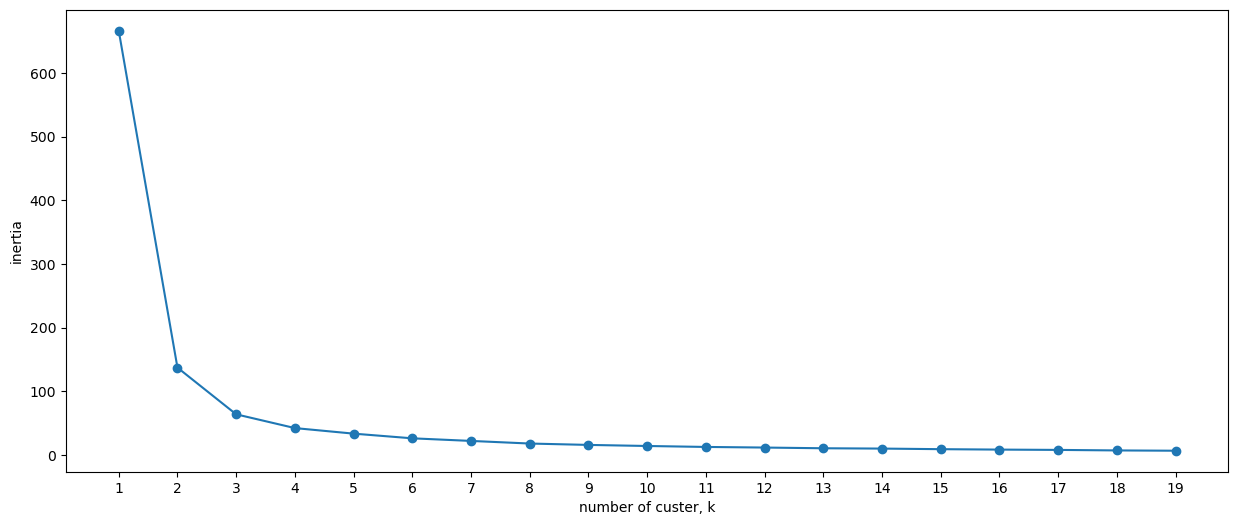

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of custer, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [47]:
model = KMeans(n_clusters=3) # 군집은 3개로 형성
model.fit(X_PCA)

KMeans(n_clusters=3)

In [48]:
# 실루엣 계수
from sklearn.metrics import silhouette_score
silhouette_score(X, model.labels_)

0.5511916046195922